In [86]:
import pandas as pd
import numpy as np
from src.data_paths import *

In [87]:
df_doi = pd.read_pickle(DOI_DF_PATH)
print("DOI DataFrame len: ", len(df_doi))
df_doi.head()

DOI DataFrame len:  40737


,fetched,title,abstract,year,month,day
doi,,,,,,
10.1021/jm9602571,True,"Cyclic HIV Protease Inhibitors: Synthesis, Co...",No abstract available,1996,1,1
10.1016/j.chembiol.2013.07.014,True,Substrate Envelope-Designed Potent HIV-1 Prote...,No abstract available,2013,9,<NA>
10.1021/jm9507183,True,"A Novel, Picomolar Inhibitor of Human Immunode...",No abstract available,1996,1,1
10.1126/science.2200122,True,"Design, Activity, and 2.8 Å Crystal Structure ...",<jats:p>\n A two-fold (\n ...,1990,8,3
10.1021/ja00082a004,True,Influence of stereochemistry on activity and b...,No abstract available,1994,2,<NA>


In [88]:
df_bindingdb = pd.read_pickle(BINDINGDB_CLEAN)
df_bindingdb.head()

,ki,ph,temp,ic50,ec50,kd,kon,koff,doi,target_name,...,chembl_id,drugbank_id,kegg_id,zinc_id,smiles,inchi_key,bindingdb_id,swissprot_target_chain_name,swissprot_target_chain_entry_name,swissprot_protein_id
0,0.24,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,<NA>,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,Gag-Pol polyprotein,POL_HV1BR,<NA>
1,0.25,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03948988,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,Gag-Pol polyprotein,POL_HV1BR,<NA>
2,0.41,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03826079,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,Gag-Pol polyprotein,POL_HV1BR,<NA>
3,0.8,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907367,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,Gag-Pol polyprotein,POL_HV1BR,<NA>
4,0.99,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907369,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,Gag-Pol polyprotein,POL_HV1BR,<NA>


**We will rely on other columns (like Target Name) and further metadata to get the cancers and mutants more accurately**

In [112]:
filtered_df = df_bindingdb
filtered_df.head()

,ki,ph,temp,ic50,ec50,kd,kon,koff,doi,target_name,...,chembl_id,drugbank_id,kegg_id,zinc_id,smiles,inchi_key,bindingdb_id,swissprot_target_chain_name,swissprot_target_chain_entry_name,swissprot_protein_id
0,0.24,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,<NA>,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,Gag-Pol polyprotein,POL_HV1BR,<NA>
1,0.25,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03948988,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,Gag-Pol polyprotein,POL_HV1BR,<NA>
2,0.41,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03826079,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,Gag-Pol polyprotein,POL_HV1BR,<NA>
3,0.8,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907367,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,Gag-Pol polyprotein,POL_HV1BR,<NA>
4,0.99,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907369,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,Gag-Pol polyprotein,POL_HV1BR,<NA>


In [113]:
len(filtered_df), len(df_bindingdb)

(2923143, 2923143)

In [114]:
cancer_ralated_proteins = filtered_df['target_name'].unique()
len(cancer_ralated_proteins)

6734

How many articles per cancer-related protein?

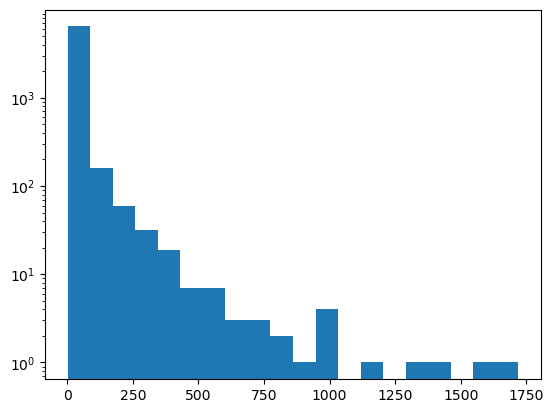

In [115]:

import matplotlib.pyplot as plt
from math import log

protein_to_doi = {prot: set() for prot in cancer_ralated_proteins}
for _, row in filtered_df.iterrows():
    protein = row['target_name']
    doi = row['doi']
    protein_to_doi[protein].add(doi)

count = {prot: len(dois) for prot, dois in protein_to_doi.items()}
# Make the histogram (log y)
hist = plt.hist(count.values(), bins=20)
plt.yscale('log')




So we that at some of the cancer-related protiens were studied hundreds of times!

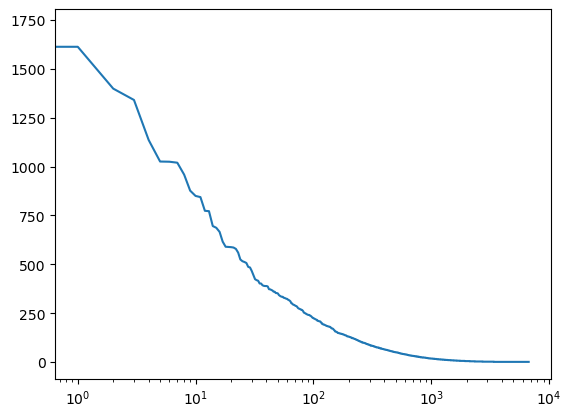

In [122]:

pl = sorted(count.values(), reverse=True)
plt.plot(pl)
# plt.yscale('log')
plt.xscale('log')

In [94]:
MIN_ARTICLES = 500
well_studied_proteins = {prot: protein_to_doi[prot] for prot, count in count.items() if count >= MIN_ARTICLES}
print(f"Number of well-studied proteins: {len(well_studied_proteins)}")
print("Well-studied proteins:")
for k in well_studied_proteins.keys():
    print(f"\t{k}")


Number of well-studied proteins: 28
Well-studied proteins:
	Cytochrome P450 3A4
	Epidermal growth factor receptor
	Proto-oncogene tyrosine-protein kinase Src
	Vascular endothelial growth factor receptor 2
	D(2) dopamine receptor
	5-hydroxytryptamine receptor 1A
	5-hydroxytryptamine receptor 2A
	Acetylcholinesterase
	Cholinesterase
	Carbonic anhydrase 1
	Carbonic anhydrase 2
	Sodium-dependent serotonin transporter
	Prothrombin
	Adenosine receptor A2a
	Histone deacetylase 1
	Delta-type opioid receptor
	Mu-type opioid receptor
	Kappa-type opioid receptor
	Cytochrome P450 2C9
	Adenosine receptor A1
	Potassium voltage-gated channel subfamily H member 2
	Cannabinoid receptor 1
	Cytochrome P450 1A2
	Cytochrome P450 2C19
	Cytochrome P450 2D6
	Sodium-dependent dopamine transporter
	Prostaglandin G/H synthase 1
	Prostaglandin G/H synthase 2


We see those are indeed distinct (not, for example, mutants of one another). How do the timelines look like?

Cytochrome P450 3A4 NA months: 0.26%
Epidermal growth factor receptor NA months: 0.00%
Proto-oncogene tyrosine-protein kinase Src NA months: 0.00%
Vascular endothelial growth factor receptor 2 NA months: 0.00%
D(2) dopamine receptor NA months: 0.00%
5-hydroxytryptamine receptor 1A NA months: 0.00%
5-hydroxytryptamine receptor 2A NA months: 0.00%
Acetylcholinesterase NA months: 0.00%
Cholinesterase NA months: 0.00%
Carbonic anhydrase 1 NA months: 0.00%
Carbonic anhydrase 2 NA months: 0.00%
Sodium-dependent serotonin transporter NA months: 0.00%


/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_1

Prothrombin NA months: 0.00%
Adenosine receptor A2a NA months: 0.00%
Histone deacetylase 1 NA months: 0.00%
Delta-type opioid receptor NA months: 0.00%
Mu-type opioid receptor NA months: 0.00%
Kappa-type opioid receptor NA months: 0.00%
Cytochrome P450 2C9 NA months: 0.00%
Adenosine receptor A1 NA months: 0.00%
Potassium voltage-gated channel subfamily H member 2 NA months: 0.00%
Cannabinoid receptor 1 NA months: 0.00%
Cytochrome P450 1A2 NA months: 0.00%
Cytochrome P450 2C19 NA months: 0.00%


/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_1

Cytochrome P450 2D6 NA months: 0.00%
Sodium-dependent dopamine transporter NA months: 0.00%
Prostaglandin G/H synthase 1 NA months: 0.00%
Prostaglandin G/H synthase 2 NA months: 0.00%


/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_106052/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)


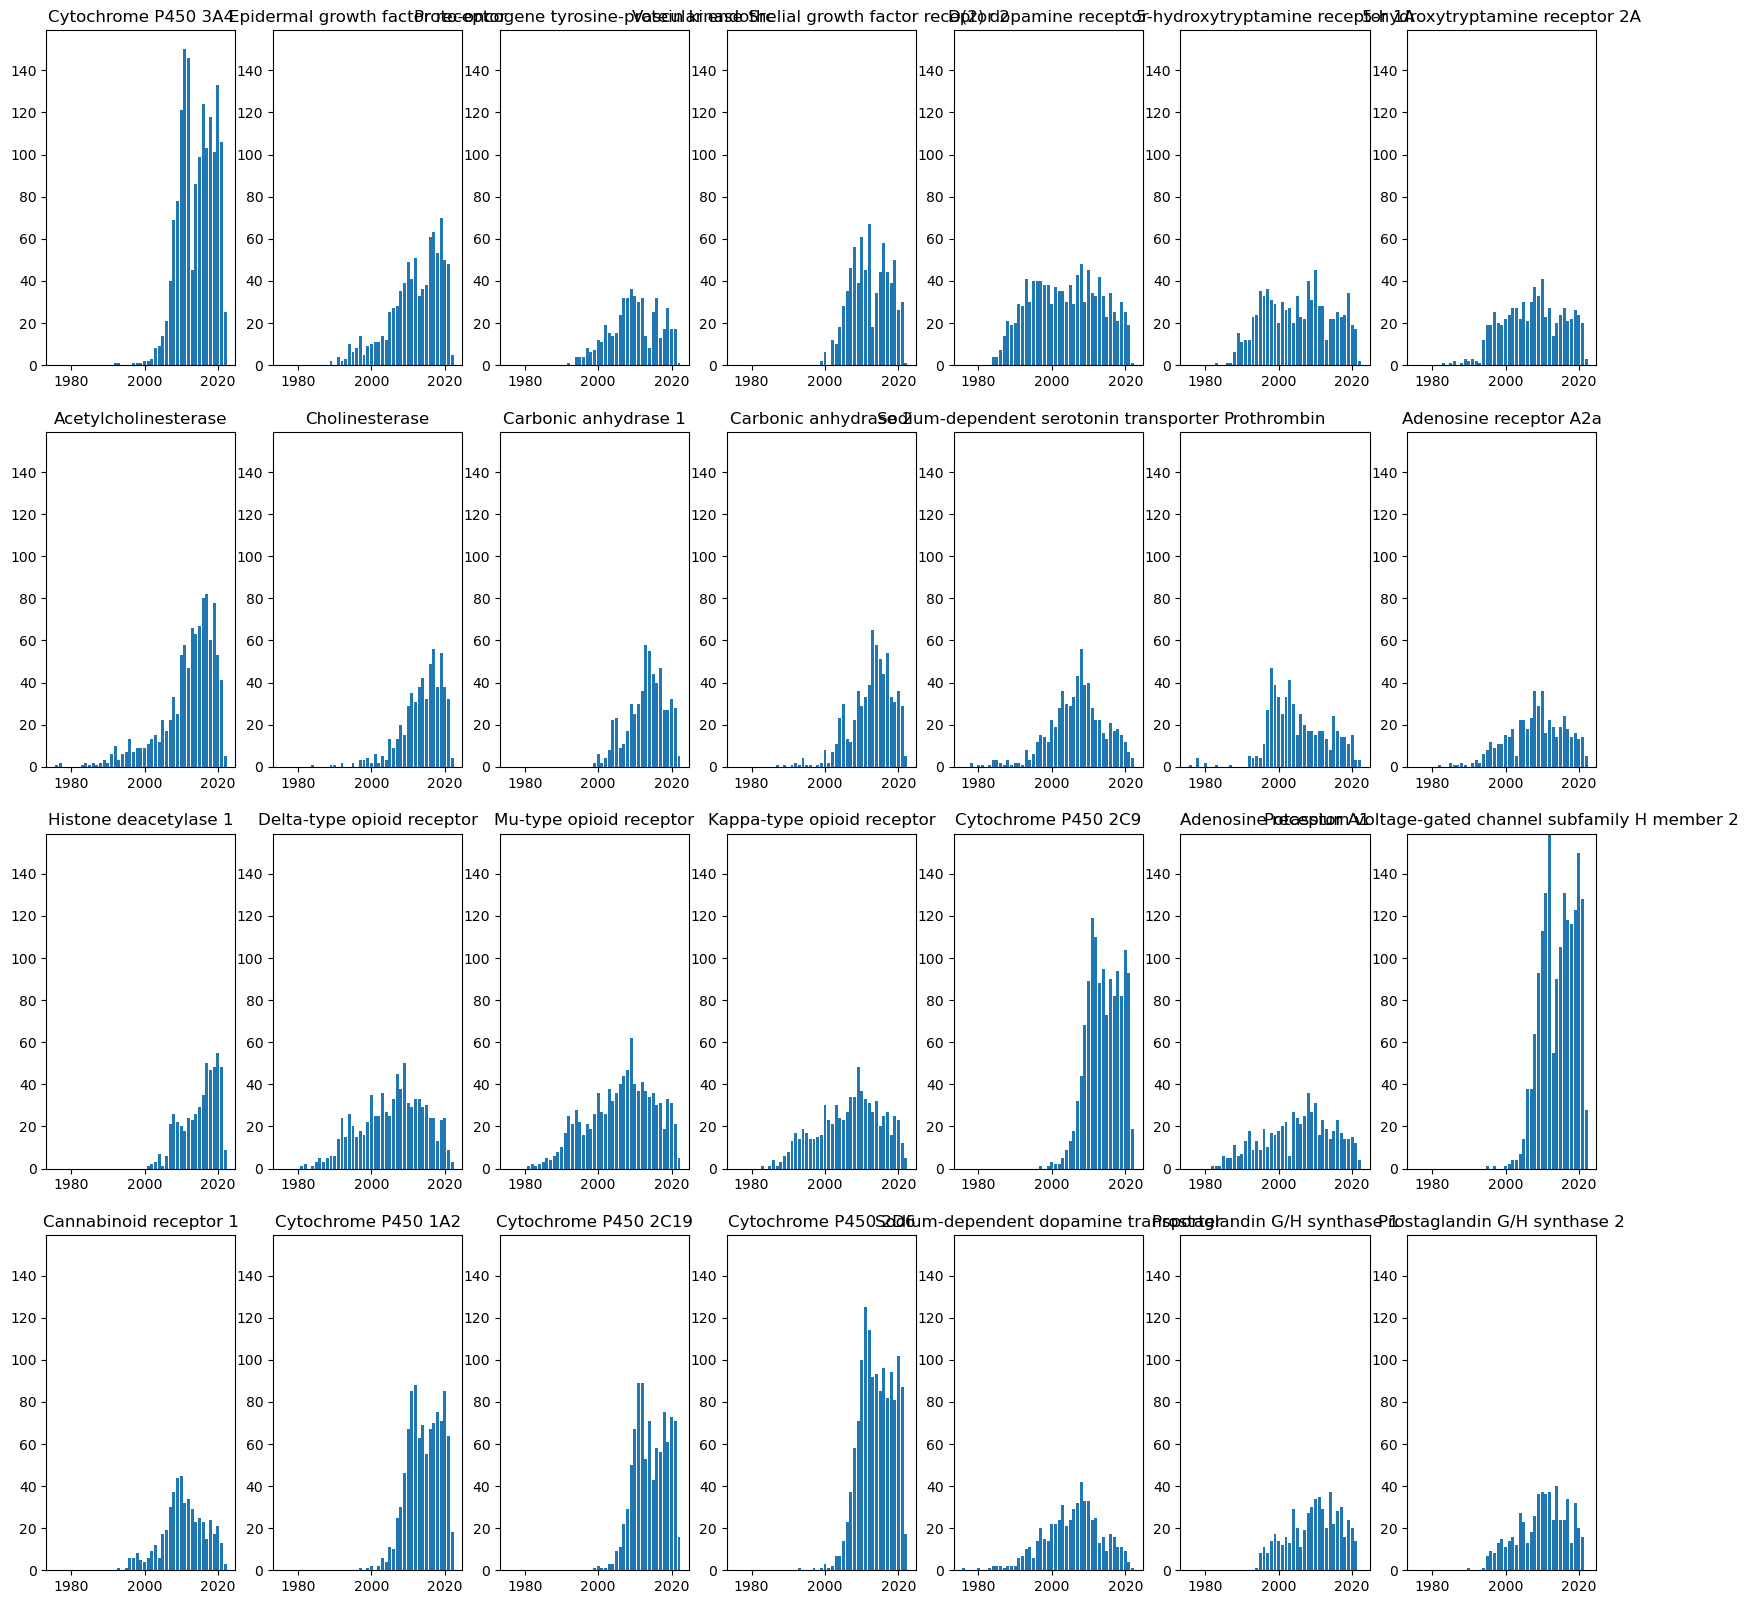

In [95]:
# Crate subplots
fig, axs = plt.subplots(4, 7, figsize=(20, 20))

well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)

max_y = 0
# Flatten the axs array
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)

    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)

    

This dose not consider the number of Ligands in a single article (the number of measurements).

In [96]:
df_doi.head()

,fetched,title,abstract,year,month,day
doi,,,,,,
10.1021/jm9602571,True,"Cyclic HIV Protease Inhibitors: Synthesis, Co...",No abstract available,1996,1,1
10.1016/j.chembiol.2013.07.014,True,Substrate Envelope-Designed Potent HIV-1 Prote...,No abstract available,2013,9,<NA>
10.1021/jm9507183,True,"A Novel, Picomolar Inhibitor of Human Immunode...",No abstract available,1996,1,1
10.1126/science.2200122,True,"Design, Activity, and 2.8 Å Crystal Structure ...",<jats:p>\n A two-fold (\n ...,1990,8,3
10.1021/ja00082a004,True,Influence of stereochemistry on activity and b...,No abstract available,1994,2,<NA>


<Axes: xlabel='year'>

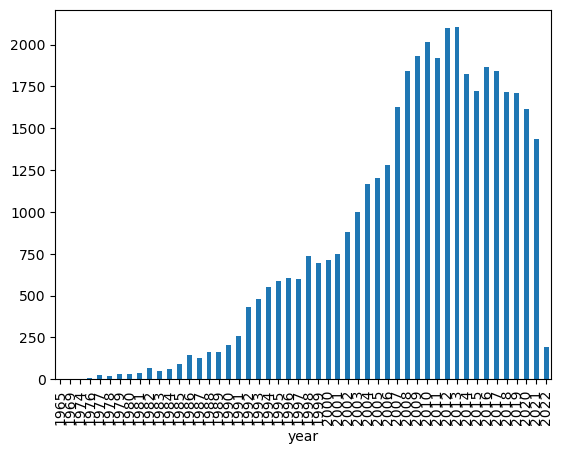

In [97]:

df_doi.dropna(subset=['year']).value_counts('year').sort_index().plot(kind='bar') 

## Cancer related

In [98]:
cancer_keywords= [
    # General Cancer Terms
    "Cancer", "Tumor", "Carcinoma", "Sarcoma", "Malignancy", "Neoplasm", 
    "Metastasis", "Oncogene", "Antineoplastic", "Chemotherapy", 
    "Radiotherapy", "Immunotherapy", "Targeted therapy", "Cytotoxic", "Cancerous"
    
    # Types of Cancer - Common Solid Tumors
    "Breast cancer", "Lung cancer", "Colorectal cancer", "Pancreatic cancer", 
    "Prostate cancer", "Melanoma", "Ovarian cancer", "Brain tumor", 
    "Liver cancer", "Gastric cancer", "Esophageal cancer", "Kidney cancer",
    
    # Types of Cancer - Hematological Malignancies
    "Leukemia", "Lymphoma", "Myeloma", "Hodgkin's lymphoma", 
    "Non-Hodgkin's lymphoma", "Chronic lymphocytic leukemia (CLL)", 
    "Acute myeloid leukemia (AML)",
    
    # Molecular Targets and Mechanisms - Proteins
    "Tyrosine kinase", "EGFR", "HER2", "VEGF", "PD-1", "PD-L1", 
    "CTLA-4", "BCL-2",
    
    # Molecular Targets and Mechanisms - Genes and Pathways
    "KRAS", "TP53", "BRCA1", "BRCA2", "MYC", "PI3K", "RAS/RAF/MEK/ERK pathway", 
    "JAK/STAT pathway", "Wnt signaling", "Hedgehog pathway",
    
    # Molecular Targets and Mechanisms - Drug Mechanisms
    "Apoptosis inducer", "Angiogenesis inhibitor", "DNA alkylation", 
    "DNA intercalation", "Topoisomerase inhibitor", "Microtubule stabilizer", 
    "Immune checkpoint inhibitor",
    
    # Specific Drug Classes
    "Alkylating agents", "Antimetabolites", "Anthracyclines", "Taxanes", 
    "Platinum compounds", "Monoclonal antibodies", "PARP inhibitors", 
    "CDK inhibitors", "HDAC inhibitors", "Proteasome inhibitors", 
    "mTOR inhibitors",
    
    # Treatment-Related Terms
    "Cytotoxicity", "Resistance", "Hormone therapy", "Anti-angiogenic", 
    "Cell cycle arrest", "Radiosensitizer", "Synergistic therapy",
    
    # Emerging Terms
    "Precision oncology", "Epigenetic modulation", 
    "Adoptive cell therapy", "CAR-T cell therapy", "Tumor microenvironment", 
    "Cancer stem cells"
]

import re

# Create a single regex pattern from the list of terms (case-insensitive)
pattern = '|'.join(rf"\b{re.escape(term)}\b" for term in cancer_keywords)

# Filter rows where "specific-description" contains any of the cancer terms
filtered_df = df_bindingdb[df_bindingdb['target_name'].str.contains(pattern, case=False, na=False)]
filtered_df.head()

,ki,ph,temp,ic50,ec50,kd,kon,koff,doi,target_name,...,chembl_id,drugbank_id,kegg_id,zinc_id,smiles,inchi_key,bindingdb_id,swissprot_target_chain_name,swissprot_target_chain_entry_name,swissprot_protein_id
3787,<NA>,7.5,20.0,10000.0,<NA>,<NA>,<NA>,<NA>,10.1021/jm970124v,Proto-oncogene tyrosine-protein kinase Src,...,CHEMBL122243,<NA>,<NA>,ZINC00006798,Nc1ncnc2n(nc(-c3ccccc3)c12)-c1ccccc1,CGWOMXNQGSNOHL-UHFFFAOYSA-N,3003,Proto-oncogene tyrosine-protein kinase Src,SRC_HUMAN,<NA>
3788,<NA>,7.5,20.0,10000.0,<NA>,<NA>,<NA>,<NA>,10.1021/jm970124v,Proto-oncogene tyrosine-protein kinase Src,...,<NA>,<NA>,<NA>,ZINC03815310,Nc1nc(N)c2c(Nc3cccc(Cl)c3)[nH]nc2n1,YASYSLUSCVNMAJ-UHFFFAOYSA-N,3004,Proto-oncogene tyrosine-protein kinase Src,SRC_HUMAN,<NA>
3789,<NA>,7.5,20.0,6000.0,<NA>,<NA>,<NA>,<NA>,10.1021/jm970124v,Proto-oncogene tyrosine-protein kinase Src,...,<NA>,<NA>,<NA>,ZINC03815293,Nc1ncnc2n[nH]c(Nc3cccc(Cl)c3)c12,ZDNMTYMNWKRHQA-UHFFFAOYSA-N,3005,Proto-oncogene tyrosine-protein kinase Src,SRC_HUMAN,<NA>
3790,<NA>,7.5,20.0,75000.0,<NA>,<NA>,<NA>,<NA>,10.1021/jm970124v,Proto-oncogene tyrosine-protein kinase Src,...,<NA>,<NA>,<NA>,ZINC00021592,N(c1[nH]nc2ncnc(Nc3ccccc3)c12)c1ccccc1,IZWVMBDZDRQDDZ-UHFFFAOYSA-N,3006,Proto-oncogene tyrosine-protein kinase Src,SRC_HUMAN,<NA>
3791,<NA>,7.5,20.0,2250.0,<NA>,<NA>,<NA>,<NA>,10.1021/jm970124v,Proto-oncogene tyrosine-protein kinase Src,...,<NA>,<NA>,<NA>,ZINC03815265,Clc1cccc(Nc2[nH]nc3ncnc(Nc4ccccc4)c23)c1,XCZCKVIRXXMKJC-UHFFFAOYSA-N,3007,Proto-oncogene tyrosine-protein kinase Src,SRC_HUMAN,<NA>


In [99]:
len(filtered_df), len(df_bindingdb)

(104574, 2923143)

In [100]:
cancer_ralated_proteins = filtered_df['target_name'].unique()
len(cancer_ralated_proteins)

208

How many articles per cancer-related protein?

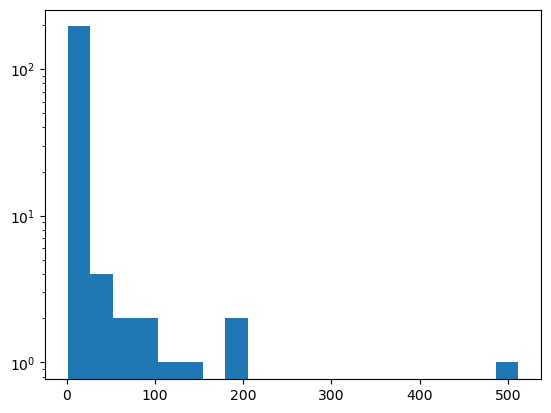

In [ ]:

import matplotlib.pyplot as plt
from math import log

protein_to_doi = {prot: set() for prot in cancer_ralated_proteins}
for _, row in filtered_df.iterrows():
    protein = row['target_name']
    doi = row['doi']
    protein_to_doi[protein].add(doi)

count = {prot: len(dois) for prot, dois in protein_to_doi.items()}
# Make the histogram (log y)
hist = plt.hist(count.values(), bins=20)
plt.yscale('log')




So we that at some of the cancer-related protiens were studied hundreds of times!

In [ ]:
MIN_ARTICLES = 35
well_studied_proteins = {prot: protein_to_doi[prot] for prot, count in count.items() if count >= MIN_ARTICLES}
print(f"Number of well-studied proteins: {len(well_studied_proteins)}")
print("Well-studied proteins:")

for k in well_studied_proteins.keys():
    print(f"\t{k}")


Number of well-studied proteins: 12
Well-studied proteins:
	Proto-oncogene tyrosine-protein kinase Src
	Bcl-2-like protein 1
	Apoptosis regulator Bcl-2
	Proto-oncogene tyrosine-protein kinase receptor Ret
	Protein-tyrosine kinase 6
	RAF proto-oncogene serine/threonine-protein kinase
	ALK tyrosine kinase receptor
	Induced myeloid leukemia cell differentiation protein Mcl-1
	Protein-tyrosine kinase 2-beta
	Proto-oncogene tyrosine-protein kinase ROS
	Multidrug resistance-associated protein 1
	GTPase KRas


We see those are indeed distinct (not, for example, mutants of one another). How do the timelines look like?

Proto-oncogene tyrosine-protein kinase Src NA months: 0.36%
Bcl-2-like protein 1 NA months: 0.00%
Apoptosis regulator Bcl-2 NA months: 0.00%
Proto-oncogene tyrosine-protein kinase receptor Ret NA months: 0.00%
Protein-tyrosine kinase 6 NA months: 0.00%
RAF proto-oncogene serine/threonine-protein kinase NA months: 0.00%
ALK tyrosine kinase receptor NA months: 0.00%
Induced myeloid leukemia cell differentiation protein Mcl-1 NA months: 0.00%
Protein-tyrosine kinase 2-beta NA months: 0.00%
Proto-oncogene tyrosine-protein kinase ROS NA months: 0.00%
Multidrug resistance-associated protein 1 NA months: 0.00%
GTPase KRas NA months: 0.00%


/tmp/ipykernel_106052/2857213910.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_106052/2857213910.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_106052/2857213910.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_1

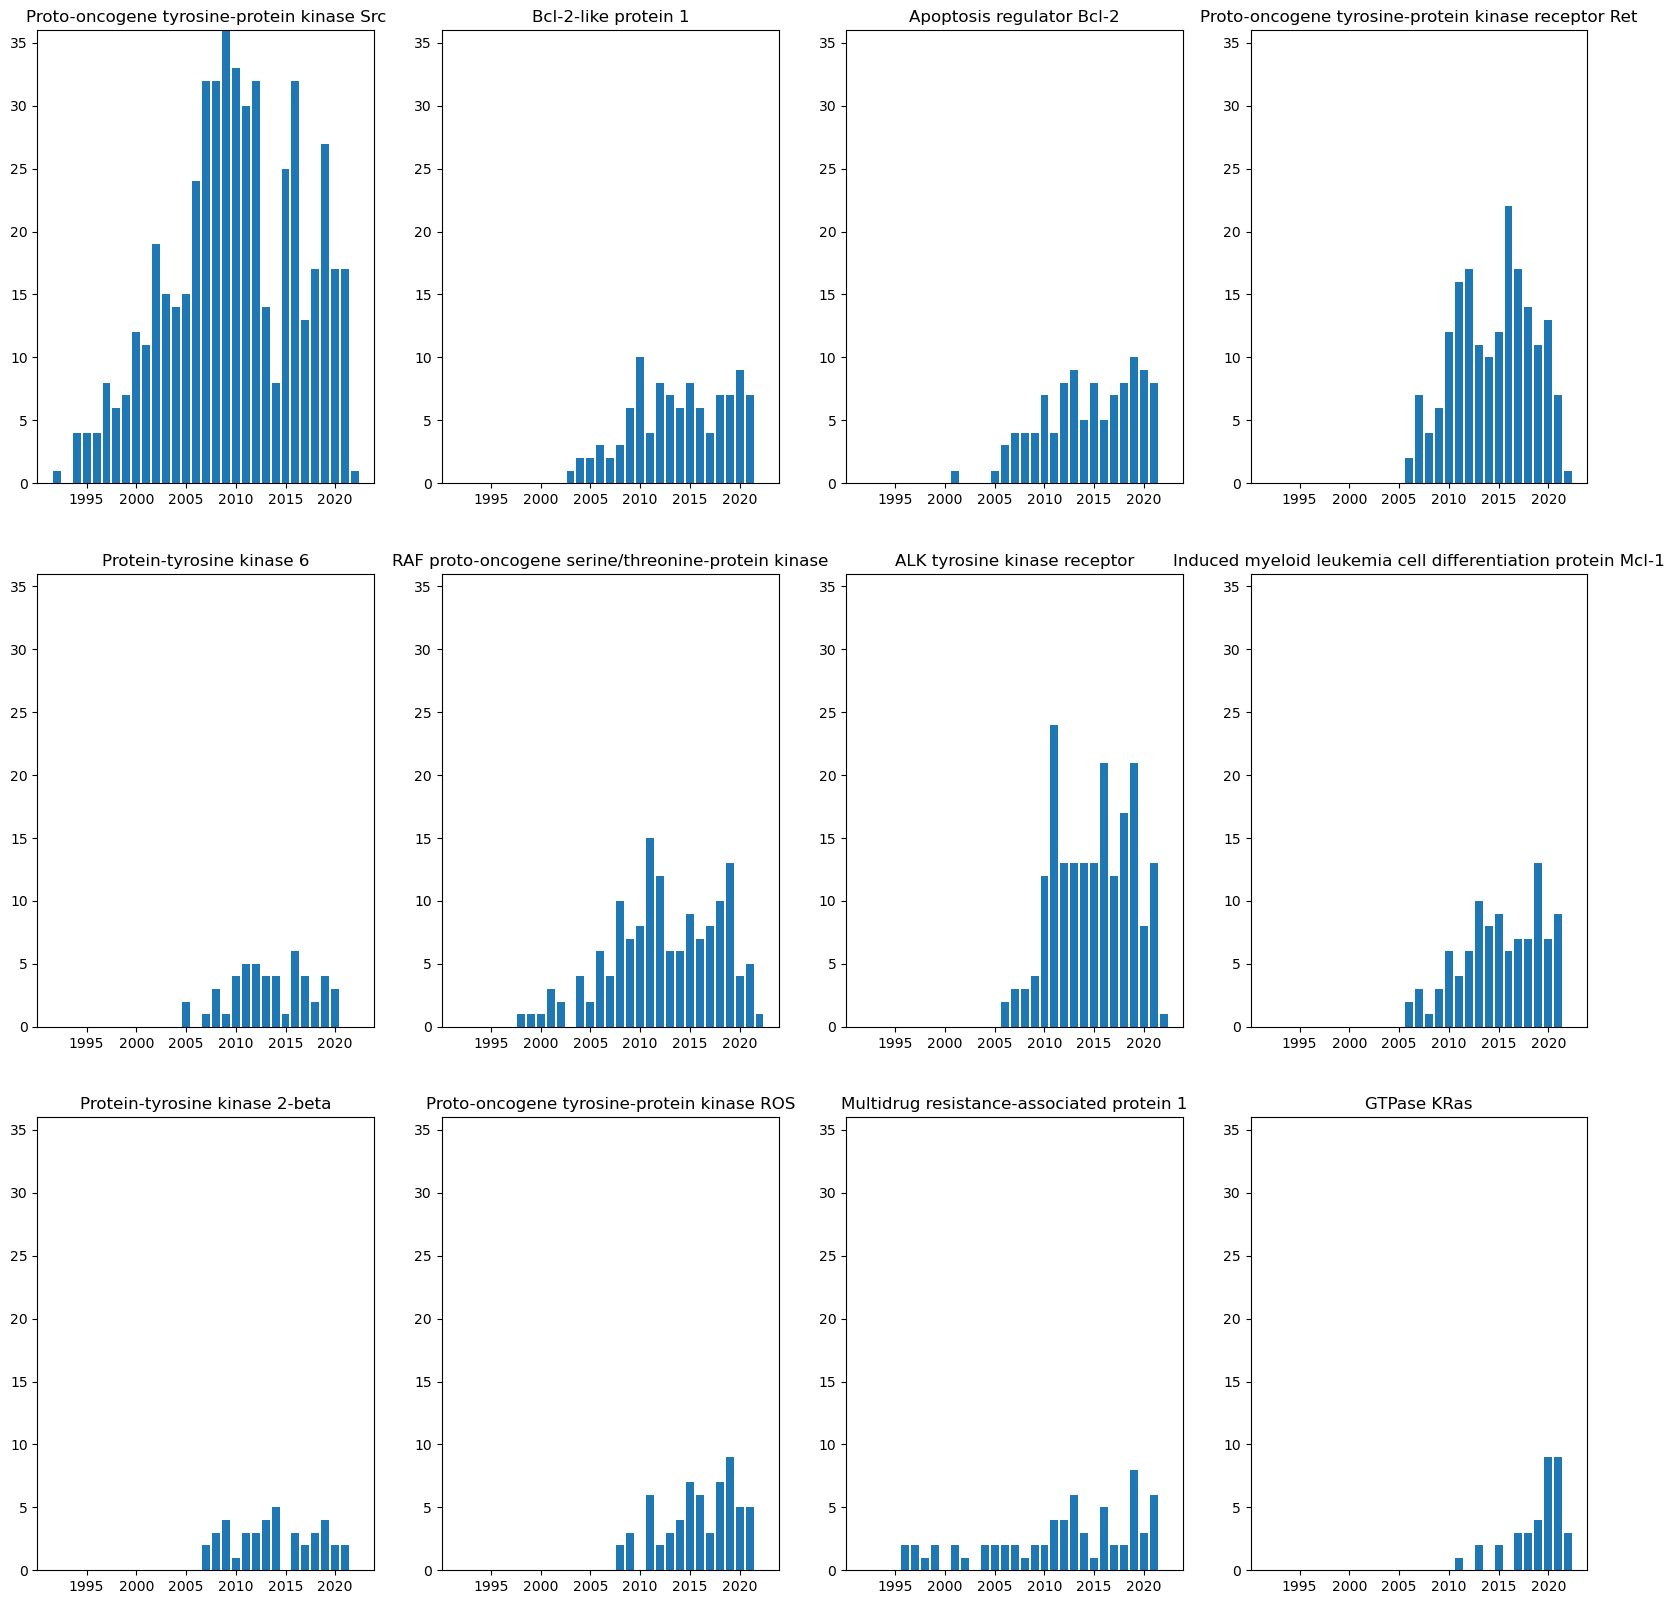

In [104]:
# Crate subplots
fig, axs = plt.subplots(3,4, figsize=(20, 20))

well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)

max_y = 0
# Flatten the axs array
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)

    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)

    

This dose not consider the number of Ligands in a single article (the number of measurements).

In [105]:
df_doi.head()

,fetched,title,abstract,year,month,day
doi,,,,,,
10.1021/jm9602571,True,"Cyclic HIV Protease Inhibitors: Synthesis, Co...",No abstract available,1996,1,1
10.1016/j.chembiol.2013.07.014,True,Substrate Envelope-Designed Potent HIV-1 Prote...,No abstract available,2013,9,<NA>
10.1021/jm9507183,True,"A Novel, Picomolar Inhibitor of Human Immunode...",No abstract available,1996,1,1
10.1126/science.2200122,True,"Design, Activity, and 2.8 Å Crystal Structure ...",<jats:p>\n A two-fold (\n ...,1990,8,3
10.1021/ja00082a004,True,Influence of stereochemistry on activity and b...,No abstract available,1994,2,<NA>


<Axes: xlabel='year'>

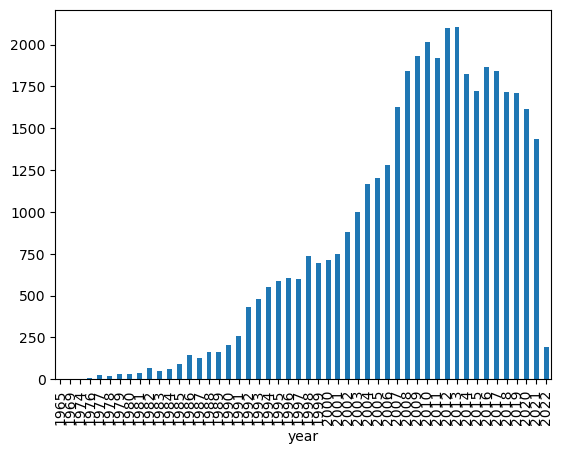

In [106]:

df_doi.dropna(subset=['year']).value_counts('year').sort_index().plot(kind='bar') 

## 1.

In [125]:
df_merged = pd.read_pickle(MERGED)
df_merged.head()

,ki,ph,temp,ic50,kd,kon,doi,pubchem_cid,chebi_id,chembl_id,...,chembl_id_DrugBank,smiles_DrugBank,inchi_key_DrugBank,chebi_id_DrugBank,bindingdb_id_DrugBank,Matched_On,name_y,general-function,specific-function,organism
0,0.24,5.5,37.0,<NA>,<NA>,<NA>,10.1021/jm9602571,3009304,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.25,5.5,37.0,<NA>,<NA>,<NA>,10.1021/jm9602571,5327236,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.41,5.5,37.0,<NA>,<NA>,<NA>,10.1021/jm9602571,5327235,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.8,5.5,37.0,<NA>,<NA>,<NA>,10.1021/jm9602571,5327234,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.99,5.5,37.0,<NA>,<NA>,<NA>,10.1021/jm9602571,3009319,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df_merged.columns

Index(['ki', 'ph', 'temp', 'ic50', 'kd', 'kon', 'doi', 'pubchem_cid',
       'chebi_id', 'chembl_id', 'drugbank_id', 'kegg_id', 'zinc_id', 'smiles',
       'inchi_key', 'bindingdb_id', 'swissprot_protein_id', 'Unique_ID',
       'chebi_id_BindingDB', 'chembl_id_BindingDB', 'drugbank_id_BindingDB',
       'smiles_BindingDB', 'inchi_key_BindingDB', 'bindingdb_id_BindingDB',
       'drugbank_id_DrugBank', 'name_x', 'unii', 'toxicity', 'class_kingdom',
       'class_superclass', 'synonyms', 'categories', 'patent_approved',
       'interaction', 'chembl_id_DrugBank', 'smiles_DrugBank',
       'inchi_key_DrugBank', 'chebi_id_DrugBank', 'bindingdb_id_DrugBank',
       'Matched_On', 'name_y', 'general-function', 'specific-function',
       'organism'],
      dtype='object')